# Advanced Pandas

In [1]:
# known import statements
import pandas as pd
import sqlite3
import os
import copy

# new import statement
import numpy as np

## Warmup 0: Get the Piazza data from 'piazza.db'

In [2]:
# write your code here
db_name = "piazza.db"
conn = sqlite3.connect(db_name)

def qry(sql):
    return pd.read_sql(sql, conn)

qry("""SELECT * FROM sqlite_master""")

type    name tbl_name  rootpage  \
0  table  piazza   piazza         2   

                                                 sql  
0  CREATE TABLE "piazza" (\n"student_id" TEXT,\n ...

In [3]:
piazza_df = qry("""SELECT * FROM piazza""")
piazza_df.head(5)

student_id          name                  email  \
0  bffd301b-3ab9-42d7-bfb1-e5d56117543a    timid city    timid_city@wisc.edu   
1  0fda0d07-ff49-4f6b-86de-c0e24ee211f1   hard coffee   hard_coffee@wisc.edu   
2  4af54672-102f-4788-bbf0-e48a7e6b1e59      hot love      hot_love@wisc.edu   
3  295ee845-0eb7-44aa-acd6-8809dc6700fa   funny house   funny_house@wisc.edu   
4  4f800f63-e006-436b-8aed-9ce43b48bf76  calm student  calm_student@wisc.edu   

      role  days_online  posts  answers  edits  followups  \
0  student            0      0        0      0          0   
1  student            0      0        0      0          0   
2  student            0      0        0      0          0   
3  student            0      0        0      0          0   
4  student            0      0        0      0          0   

   replies_to_followups  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

## Warmup 1: Set the student id column as the index

In [4]:
# write your code here
piazza_df = piazza_df.set_index("student_id")
piazza_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0  
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0  
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0  
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0  
...                                     ...        ...                   ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0  
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0  
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0  
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0  

[800 rows x 9 columns]

## Warmup 2a: Which 10 students post the most?

In [5]:
# write your code here
top_students = piazza_df[piazza_df["role"] == "student"].sort_values("posts", ascending=False).head(10)
top_students

name                   email  \
student_id                                                                    
af42117d-6f04-450a-8766-61d947d26862   narrow table   narrow_table@wisc.edu   
b824ed12-13a0-4bfa-9129-7b329c098868      thick bus      thick_bus@wisc.edu   
32091fdf-d857-4b2c-bbfd-c0a213d6fe12    silent city    silent_city@wisc.edu   
fa4077ca-8344-415d-8153-2c31d0dcc081    old student    old_student@wisc.edu   
a48a4d6a-8c23-4b6a-93c7-571b4bd62bd8   sad airplane   sad_airplane@wisc.edu   
d0641d71-4faa-4e71-b9b4-ec70eed5796d     sweet rain     sweet_rain@wisc.edu   
f67b48e1-aef1-4b56-8a56-ac921e42db4b     slow phone     slow_phone@wisc.edu   
efe75c65-2b67-42a0-bf5a-8bd214f1d84d  fast laughter  fast_laughter@wisc.edu   
eccc49cc-00f7-4414-a7db-7ce332c7306a      young bus      young_bus@wisc.edu   
04d44c73-218d-49b6-905c-0454b94831ef       cold bus       cold_bus@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
af42117d-6f04-450a-8766-61d947d26862  student          231     37        6   
b824ed12-13a0-4bfa-9129-7b329c098868  student          172     29        3   
32091fdf-d857-4b2c-bbfd-c0a213d6fe12  student           98     27        4   
fa4077ca-8344-415d-8153-2c31d0dcc081  student          354     24        2   
a48a4d6a-8c23-4b6a-93c7-571b4bd62bd8  student          178     19        1   
d0641d71-4faa-4e71-b9b4-ec70eed5796d  student           84     18        0   
f67b48e1-aef1-4b56-8a56-ac921e42db4b  student          268     16        3   
efe75c65-2b67-42a0-bf5a-8bd214f1d84d  student          365     15        1   
eccc49cc-00f7-4414-a7db-7ce332c7306a  student           75     15        0   
04d44c73-218d-49b6-905c-0454b94831ef  student           40     15        0   

                                      edits  followups  replies_to_followups  
student_id                                                                    
af42117d-6f04-450a-8766-61d947d26862      1          7                     4  
b824ed12-13a0-4bfa-9129-7b329c098868      0          0                     1  
32091fdf-d857-4b2c-bbfd-c0a213d6fe12      0          2                     7  
fa4077ca-8344-415d-8153-2c31d0dcc081      0          6                     2  
a48a4d6a-8c23-4b6a-93c7-571b4bd62bd8      0          2                     0  
d0641d71-4faa-4e71-b9b4-ec70eed5796d      0          4                     1  
f67b48e1-aef1-4b56-8a56-ac921e42db4b      0          7                     4  
efe75c65-2b67-42a0-bf5a-8bd214f1d84d      0          5                     3  
eccc49cc-00f7-4414-a7db-7ce332c7306a      0          3                     6  
04d44c73-218d-49b6-905c-0454b94831ef      0          6                     4

## Warmup 2b: Can you plot their number of posts as a bar graph?

Be sure to label your axes!

Text(0.5, 1.0, 'Top Posting Students')

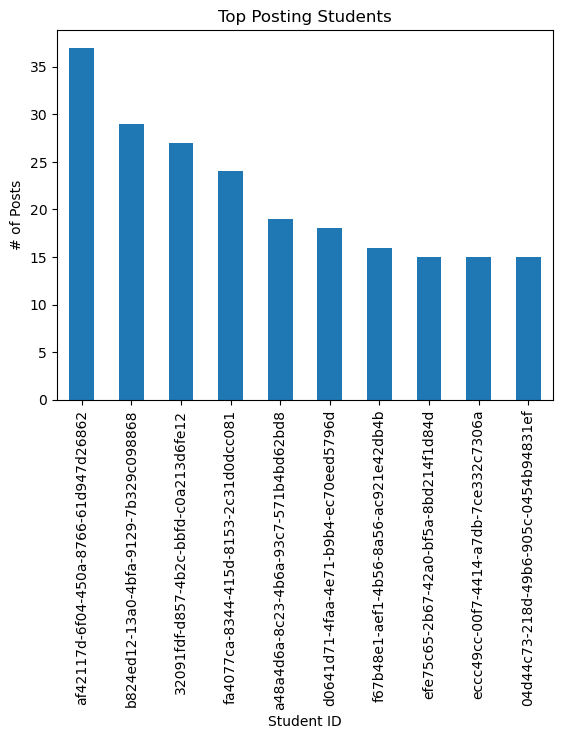

In [6]:
# write your code here
ax = top_students["posts"].plot.bar()
ax.set_xlabel("Student ID")
ax.set_ylabel("# of Posts")
ax.set_title("Top Posting Students")

## Warmup 2c: How about with their name rather than their student id?

Text(0.5, 1.0, 'Top Posting Students')

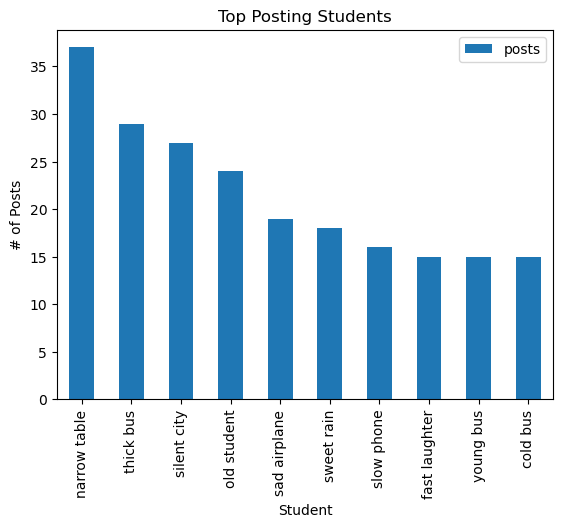

In [7]:
# write your code here
ax = top_students.plot.bar(x="name", y="posts")
ax.set_xlabel("Student")
ax.set_ylabel("# of Posts")
ax.set_title("Top Posting Students")

## Warmup 3a: Which people had more than 10 answers? Include all roles

In [8]:
# write your code here
top_answers = piazza_df[piazza_df["answers"] > 10].sort_values("answers", ascending=False)
top_answers

name                     email  \
student_id                                                                      
291bc772-3bb4-4461-bc14-02580937811b    stormy door      stormy_door@wisc.edu   
f1b776b5-be88-423a-af72-4c989f95a661                   loud_computer@wisc.edu   
10e7f31b-b213-4efd-81da-15faabf82ae5     tight rain       tight_rain@wisc.edu   
80764a25-00dd-49ac-95eb-3903b417c81e     quiet rain       quiet_rain@wisc.edu   
7880e6fa-a00d-48f4-8374-3176512c3236    silent time                             
11a1224c-8310-4b16-a50f-5b6a485793ee                 stormy_laughter@wisc.edu   
b5963cff-ffe0-460d-b356-d3ef5aa72a5b                                            
9f8ac76d-ce1d-4da0-be4b-09b1442922a0                      soft_apple@wisc.edu   
87cd9484-cae8-458f-a101-ddd6632d84e7    loose music      loose_music@wisc.edu   
47dd3e0a-f792-4a93-a31e-5c4d3536ac5f      hot train        hot_train@wisc.edu   
ec12974a-6790-4b5f-85ff-dd5dc1dc63b6    short apple      short_apple@wisc.edu   
d423ed1e-d95a-462d-8c18-fb66309942f1     sour table       sour_table@wisc.edu   
f8ab1dcb-fa24-4f12-93bb-57a19cf17d5c   large bridge     large_bridge@wisc.edu   
3c06148c-a67b-4127-8f77-54955d02da62       hard car         hard_car@wisc.edu   
4307b923-c97b-4746-b049-9dfa5b6282f9                      thin_river@wisc.edu   
e9608a83-6dfb-4444-a1eb-194ab57f465b  thin airplane    thin_airplane@wisc.edu   
118a5569-728d-4572-9cc2-8665ebcef401     timid door       timid_door@wisc.edu   

                                            role  days_online  posts  answers  \
student_id                                                                      
291bc772-3bb4-4461-bc14-02580937811b          ta          101     35      296   
f1b776b5-be88-423a-af72-4c989f95a661  instructor          292     41      278   
10e7f31b-b213-4efd-81da-15faabf82ae5  instructor          252     11      169   
80764a25-00dd-49ac-95eb-3903b417c81e  instructor          336      5      107   
7880e6fa-a00d-48f4-8374-3176512c3236  instructor          283      1       84   
11a1224c-8310-4b16-a50f-5b6a485793ee          ta          185      0       75   
b5963cff-ffe0-460d-b356-d3ef5aa72a5b  instructor           58      0       70   
9f8ac76d-ce1d-4da0-be4b-09b1442922a0          ta          332      0       59   
87cd9484-cae8-458f-a101-ddd6632d84e7  instructor          201      0       58   
47dd3e0a-f792-4a93-a31e-5c4d3536ac5f          ta          104      0       53   
ec12974a-6790-4b5f-85ff-dd5dc1dc63b6          ta           94      0       51   
d423ed1e-d95a-462d-8c18-fb66309942f1          ta          214      0       44   
f8ab1dcb-fa24-4f12-93bb-57a19cf17d5c          ta           48      0       37   
3c06148c-a67b-4127-8f77-54955d02da62          ta          185      1       27   
4307b923-c97b-4746-b049-9dfa5b6282f9          ta           96      0       19   
e9608a83-6dfb-4444-a1eb-194ab57f465b     student          233      4       12   
118a5569-728d-4572-9cc2-8665ebcef401          ta           61      4       12   

                                      edits  followups  replies_to_followups  
student_id                                                                    
291bc772-3bb4-4461-bc14-02580937811b    130        118                   145  
f1b776b5-be88-423a-af72-4c989f95a661     58         86                   103  
10e7f31b-b213-4efd-81da-15faabf82ae5     91         13                    25  
80764a25-00dd-49ac-95eb-3903b417c81e     10         24                    28  
7880e6fa-a00d-48f4-8374-3176512c3236     55          6                    24  
11a1224c-8310-4b16-a50f-5b6a485793ee     11          8                     7  
b5963cff-ffe0-460d-b356-d3ef5aa72a5b      7          0                     4  
9f8ac76d-ce1d-4da0-be4b-09b1442922a0     24          2                    11  
87cd9484-cae8-458f-a101-ddd6632d84e7      4          2                     9  
47dd3e0a-f792-4a93-a31e-5c4d3536ac5f      4          3                     4  
ec12974a-6790-4b5f-

## Warmup 3b: Plot this as a bar graph

<Axes: xlabel='student_id'>

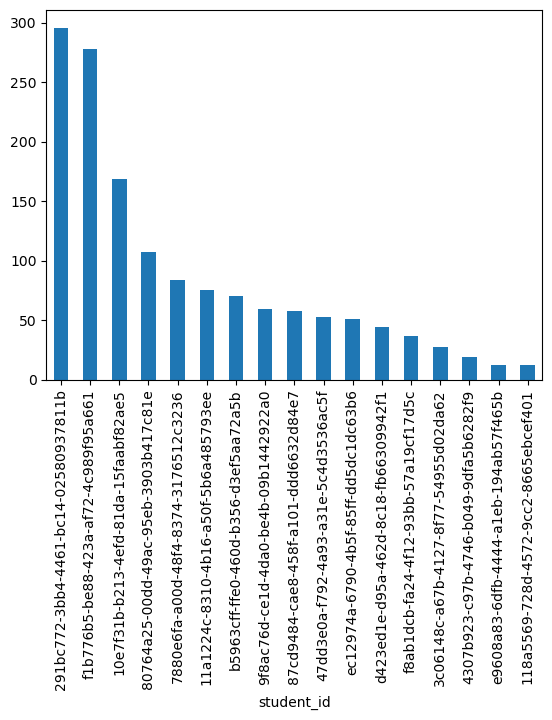

In [9]:
# write your code here
top_answers["answers"].plot.bar()

## Warmup 3c: Plot the number of top answerers in each role as a bar graph

<Axes: xlabel='role'>

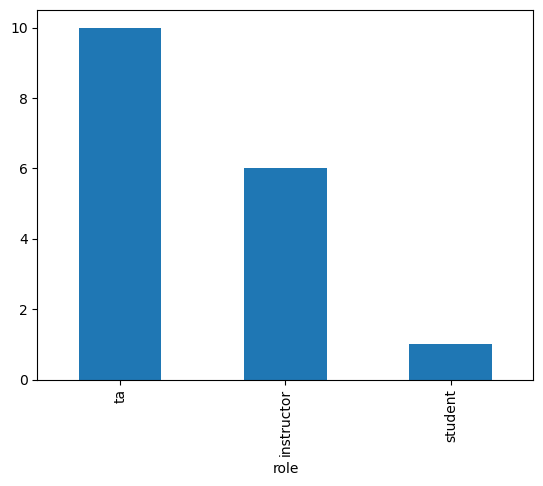

In [10]:
# write your code here
top_answers["role"].value_counts().plot.bar()

## Warmup 3d: Can you get this same data using SQL?

In [11]:
# write your code here
qry("""
SELECT role, COUNT(*) as `number of answers`
FROM piazza
WHERE answers > 10
GROUP BY role
ORDER BY `number of answers` DESC
""")

role  number of answers
0          ta                 10
1  instructor                  6
2     student                  1

## Warmup 3e: What about their average # of days online as well?

In [12]:
# write your code here
qry("""
SELECT role, COUNT(*) as `number of answers`, AVG(days_online) as `average days online`
FROM piazza
WHERE answers > 10
GROUP BY role
ORDER BY `number of answers` DESC
""")

role  number of answers  average days online
0          ta                 10                142.0
1  instructor                  6                237.0
2     student                  1                233.0

## Warmup 3f: Can we do that in Pandas as well?

# Today's Learning Objectives: 

* Setting column as index for pandas `DataFrame`
* Identify, drop, or fill missing values (`np.NaN`) using Pandas `isna`, `dropna`, and `fillna`
* Applying transformations to `DataFrame`:
  * Use `apply` on pandas `Series` to apply a transformation function
  * Use `replace` to replace all target values in Pandas `Series` and `DataFrame` rows / columns
* Filter, aggregate, group, and summarize information in a `DataFrame` with `groupby`
* Convert .groupby examples to SQL
* Solving the same question using SQL and pandas `DataFrame` manipulations:
  * filtering, grouping, and aggregation / summarization

## Example 1: Sort `piazza_df` by name

In [13]:
# ... What do we notice?
piazza_df.sort_values("name")

name                  email  \
student_id                                                                  
7c1bed42-3d12-4027-bdce-d3df0b9443b4                    hot_time@wisc.edu   
9434914d-88d0-4e64-b3b7-4e864635cfdb                  thick_love@wisc.edu   
6ad21c80-1853-4918-a6dc-a5814199b1c5                serious_door@wisc.edu   
15960bb8-bdc7-4c5e-83dc-99bb95c96f94                  young_time@wisc.edu   
5c82bf29-303e-4d29-b17b-4709933dbd4b                   calm_star@wisc.edu   
...                                            ...                    ...   
74cbaf6e-34e7-4dd0-b577-8164f1d525d7   young music   young_music@wisc.edu   
50c9efda-f01d-43ca-b79e-0dfd03199020   young ocean   young_ocean@wisc.edu   
ab58109e-5493-4893-a301-d85533255707   young river                          
8777e788-7e7e-4193-8f1a-deed767ecdca    young road    young_road@wisc.edu   
0e67e72c-55cd-4e66-8841-1daffb3f5204  young window  young_window@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
7c1bed42-3d12-4027-bdce-d3df0b9443b4  student           86      2        0   
9434914d-88d0-4e64-b3b7-4e864635cfdb  student           19      0        0   
6ad21c80-1853-4918-a6dc-a5814199b1c5  student            4      0        0   
15960bb8-bdc7-4c5e-83dc-99bb95c96f94  student          198      8        0   
5c82bf29-303e-4d29-b17b-4709933dbd4b  student           54      1        0   
...                                       ...          ...    ...      ...   
74cbaf6e-34e7-4dd0-b577-8164f1d525d7  student           25      1        0   
50c9efda-f01d-43ca-b79e-0dfd03199020  student          298      2        2   
ab58109e-5493-4893-a301-d85533255707       ta          143      0        0   
8777e788-7e7e-4193-8f1a-deed767ecdca  student           18      3        0   
0e67e72c-55cd-4e66-8841-1daffb3f5204  student           45      1        1   

                                      edits  followups  replies_to_followups  
student_id                                                                    
7c1bed42-3d12-4027-bdce-d3df0b9443b4      0          0                     0  
9434914d-88d0-4e64-b3b7-4e864635cfdb      0          0                     0  
6ad21c80-1853-4918-a6dc-a5814199b1c5      0          0                     0  
15960bb8-bdc7-4c5e-83dc-99bb95c96f94      0          1                     0  
5c82bf29-303e-4d29-b17b-4709933dbd4b      0          0                     0  
...                                     ...        ...                   ...  
74cbaf6e-34e7-4dd0-b577-8164f1d525d7      0          0                     0  
50c9efda-f01d-43ca-b79e-0dfd03199020      2          0                     0  
ab58109e-5493-4893-a301-d85533255707      0          0                     0  
8777e788-7e7e-4193-8f1a-deed767ecdca      0          0                     0  
0e67e72c-55cd-4e66-8841-1daffb3f5204      0          0                     0  

[800 rows x 9 columns]

### Not a Number

- `np.NaN` is the floating point representation of Not a Number
- You do not need to know / learn the details about the `numpy` package 

### Replacing / modifying values within the `DataFrame`

Syntax: `df.replace(<TARGET>, <REPLACE>)`

#### Replacing missing values (empty strings) with `np.NaN`

In [14]:
piazza_df = piazza_df.replace("", np.NaN)
piazza_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0  
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0  
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0  
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0  
...                                     ...        ...                   ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0  
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0  
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0  
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0  

[800 rows x 9 columns]

## Example 2: Sort `piazza_df` by name again

In [15]:
# ... What do we notice?
piazza_df.sort_values("name")

name                    email  \
student_id                                                                      
d19df22f-6fe2-4bbb-8f6d-3fcbb3a31b8e     ancient art     ancient_art@wisc.edu   
808afa38-ed47-4760-aa74-5239aa741356  ancient bridge  ancient_bridge@wisc.edu   
d399cbd5-9a08-4c87-bb2b-007c25297790     ancient bus                      NaN   
fc46cec5-3b41-4bf6-b720-ada21a1c800e     ancient cat     ancient_cat@wisc.edu   
021a54be-5de0-4cea-a003-ca4782bbb9cb   ancient chair   ancient_chair@wisc.edu   
...                                              ...                      ...   
9212f49b-40da-4bf9-87b0-a171ad32669d             NaN   ancient_river@wisc.edu   
b5963cff-ffe0-460d-b356-d3ef5aa72a5b             NaN                      NaN   
6c42a9e8-0b53-431d-9c49-1069c1b0e841             NaN     short_house@wisc.edu   
cf055ef8-4baa-4a43-851c-060e2e4f310d             NaN      noisy_bird@wisc.edu   
d82d6135-8953-4521-ac93-cef0d01bf2b5             NaN     serious_sun@wisc.edu   

                                            role  days_online  posts  answers  \
student_id                                                                      
d19df22f-6fe2-4bbb-8f6d-3fcbb3a31b8e     student           97      0        0   
808afa38-ed47-4760-aa74-5239aa741356  instructor          122      1        1   
d399cbd5-9a08-4c87-bb2b-007c25297790     student            1      0        0   
fc46cec5-3b41-4bf6-b720-ada21a1c800e     student           96      9        0   
021a54be-5de0-4cea-a003-ca4782bbb9cb     student           19      0        1   
...                                          ...          ...    ...      ...   
9212f49b-40da-4bf9-87b0-a171ad32669d     student          198      2        0   
b5963cff-ffe0-460d-b356-d3ef5aa72a5b  instructor           58      0       70   
6c42a9e8-0b53-431d-9c49-1069c1b0e841     student          233      0        1   
cf055ef8-4baa-4a43-851c-060e2e4f310d     student           38      9        0   
d82d6135-8953-4521-ac93-cef0d01bf2b5     student           60      1        0   

                                      edits  followups  replies_to_followups  
student_id                                                                    
d19df22f-6fe2-4bbb-8f6d-3fcbb3a31b8e      0          0                     0  
808afa38-ed47-4760-aa74-5239aa741356      0          0                     0  
d399cbd5-9a08-4c87-bb2b-007c25297790      0          0                     0  
fc46cec5-3b41-4bf6-b720-ada21a1c800e      0          2                     1  
021a54be-5de0-4cea-a003-ca4782bbb9cb      0          0                     0  
...                                     ...        ...                   ...  
9212f49b-40da-4bf9-87b0-a171ad32669d      0          0                     0  
b5963cff-ffe0-460d-b356-d3ef5aa72a5b      7          0                     4  
6c42a9e8-0b53-431d-9c49-1069c1b0e841      0          0                     0  
cf055ef8-4baa-4a43-851c-060e2e4f310d      0          1                     1  
d82d6135-8953-4521-ac93-cef0d01bf2b5      0          0                     0  

[800 rows x 9 columns]

### Checking for missing values

Syntax: `Series.isna()`
- Returns a boolean Series

In [16]:
piazza_df["name"].isna()

student_id
bffd301b-3ab9-42d7-bfb1-e5d56117543a    False
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    False
4af54672-102f-4788-bbf0-e48a7e6b1e59    False
295ee845-0eb7-44aa-acd6-8809dc6700fa    False
4f800f63-e006-436b-8aed-9ce43b48bf76    False
                                        ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6    False
50a18796-c7ff-4a20-9f8f-30d9db075db5    False
877efa7c-a88d-45f9-85b0-73b2378f493c    False
3fd9b2c0-7974-4f14-896e-9b59dfda2bca    False
36e2dbd3-95c9-4ee7-8e02-db96656906df    False
Name: name, Length: 800, dtype: bool

## Example 3: How many people are missing a name?

In [17]:
piazza_df["name"].isna().value_counts()

name
False    742
True      58
Name: count, dtype: int64

## Exercise 1: How many people are missing an email?

In [18]:
# write your code here
piazza_df["email"].isna().value_counts()

email
False    741
True      59
Name: count, dtype: int64

## Example 4: How many people are missing both a name and an email?

In [19]:
((piazza_df["name"].isna()) & (piazza_df["email"].isna())).value_counts()

False    788
True      12
Name: count, dtype: int64

## Exercise 2: How many people are missing either a name or email?

In [20]:
# write your code here
((piazza_df["name"].isna()) | (piazza_df["email"].isna())).value_counts()

False    695
True     105
Name: count, dtype: int64

### So... What do we do?

1. Drop those rows
2. Interpolate / Best Guess

#### Option 1: Drop those rows

In [21]:
pure_piazza_df = piazza_df.dropna()
pure_piazza_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0  
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0  
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0  
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0  
...                                     ...        ...                   ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0  
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0  
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0  
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0  

[695 rows x 9 columns]

#### Option 2a: Interpolate / Best Guess

In [22]:
anon_piazza_df = piazza_df.fillna("Anonymous")
anon_piazza_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0  
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0  
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0  
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0  
...                                     ...        ...                   ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0  
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0  
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0  
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0  

[800 rows x 9 columns]

#### Option 2b: Interpolate / Best Guess (but a bit better)

Create a function to take an email (e.g. `"calm_star@wisc.edu"`) and return the name (e.g. "calm star"). If the email is `np.nan`, then return it as it is.

In [23]:
# write your code here
def parse_name_from_email(email):
    if pd.isna(email):
        return np.nan
    return email.split("@")[0].replace("_", " ")

In [24]:
# test your function!
parse_name_from_email("calm_star@wisc.edu")

'calm star'

### Review: `Pandas.Series.apply(...)`
Syntax: `Series.apply(<FUNCTION OBJECT REFERENCE>)`
- applies input function to every element of the Series.
- Returns a new `Series`

#### Now, apply that function to each value in email!

In [25]:
guessed_df = copy.copy(piazza_df)
guessed_df["guessed_name"] = guessed_df["email"].apply(parse_name_from_email)
guessed_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  \
student_id                                                                     
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0   
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0   
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0   
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0   
...                                     ...        ...                   ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0   
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0   
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0   
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0   

                                       guessed_name  
student_id                                           
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee  
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love  
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house  
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student  
...                                             ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee  
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music  
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend  

[800 rows x 10 columns]

## Exercise 3: Add a column `guessed_email` to `guessed_df` similar to the column `guessed_name`

In [26]:
# write your code here
def parse_email_from_name(name):
    if pd.isna(name):
        return np.nan
    else:
        return name.replace(" ", "_") + "@wisc.edu"

guessed_df["guessed_email"] = guessed_df["name"].apply(parse_email_from_name)
guessed_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  \
student_id                                                                     
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0   
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0   
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0   
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0   
...                                     ...        ...                   ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0   
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0   
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0   
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0   

                                       guessed_name           guessed_email  
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu  
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu  
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu  
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu  
...                                             ...                     ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu  
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu  
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu  
36e2dbd3-95c9-4ee7-8e02-db9

### `Pandas.DataFrame.apply(...)`
Syntax: `DataFrame.apply(<FUNCTION OBJECT REFERENCE>, axis=1)`
- `axis=1` means apply to each row.
- returns a new `Series`

## Example 5: Update the column `name` so that the guessed name is used if the `name` is missing

In [27]:
guessed_df["name"] = guessed_df.apply(lambda r : r["guessed_name"] if pd.isna(r["name"]) else r["name"], axis=1)
guessed_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  \
student_id                                                                     
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0   
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0   
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0   
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0   
...                                     ...        ...                   ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0   
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0   
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0   
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0   

                                       guessed_name           guessed_email  
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu  
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu  
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu  
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu  
...                                             ...                     ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu  
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu  
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu  
36e2dbd3-95c9-4ee7-8e02-db9

## Exercise 4: Do the same thing for email

In [28]:
# write your code here
guessed_df["email"] = guessed_df.apply(lambda r : r["guessed_email"] if pd.isna(r["email"]) else r["email"], axis=1)
guessed_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  \
student_id                                                                     
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0   
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0   
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0   
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0   
...                                     ...        ...                   ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0   
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0   
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0   
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0   

                                       guessed_name           guessed_email  
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu  
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu  
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu  
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu  
...                                             ...                     ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu  
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu  
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu  
36e2dbd3-95c9-4ee7-8e02-db9

#### Drop the guessing columns

In [29]:
guessed_df = guessed_df.drop("guessed_name", axis=1)
guessed_df = guessed_df.drop("guessed_email", axis=1)
guessed_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0  
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0  
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0  
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0  
...                                     ...        ...                   ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0  
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0  
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0  
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0  

[800 rows x 9 columns]

In [30]:
# test how many rows have missing data now!
(guessed_df['email'].isna() | guessed_df['name'].isna()).value_counts()

False    788
True      12
Name: count, dtype: int64

## Exercise 5: Give a name of `"anonymous"` and email of `"anonymous@wisc.edu"` to anyone with missing data

In [31]:
# write your code here
guessed_df["name"] = guessed_df["name"].fillna("anonymous")
guessed_df["email"] = guessed_df["email"].fillna("anonymous@wisc.edu")
guessed_df

name                   email  \
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a     timid city     timid_city@wisc.edu   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1    hard coffee    hard_coffee@wisc.edu   
4af54672-102f-4788-bbf0-e48a7e6b1e59       hot love       hot_love@wisc.edu   
295ee845-0eb7-44aa-acd6-8809dc6700fa    funny house    funny_house@wisc.edu   
4f800f63-e006-436b-8aed-9ce43b48bf76   calm student   calm_student@wisc.edu   
...                                             ...                     ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6   clean coffee   clean_coffee@wisc.edu   
50a18796-c7ff-4a20-9f8f-30d9db075db5    stale music    stale_music@wisc.edu   
877efa7c-a88d-45f9-85b0-73b2378f493c     wide music     wide_music@wisc.edu   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  thick country  thick_country@wisc.edu   
36e2dbd3-95c9-4ee7-8e02-db96656906df    fast friend    fast_friend@wisc.edu   

                                         role  days_online  posts  answers  \
student_id                                                                   
bffd301b-3ab9-42d7-bfb1-e5d56117543a  student            0      0        0   
0fda0d07-ff49-4f6b-86de-c0e24ee211f1  student            0      0        0   
4af54672-102f-4788-bbf0-e48a7e6b1e59  student            0      0        0   
295ee845-0eb7-44aa-acd6-8809dc6700fa  student            0      0        0   
4f800f63-e006-436b-8aed-9ce43b48bf76  student            0      0        0   
...                                       ...          ...    ...      ...   
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6  student            9      0        0   
50a18796-c7ff-4a20-9f8f-30d9db075db5  student           94      1        0   
877efa7c-a88d-45f9-85b0-73b2378f493c  student           47      2        1   
3fd9b2c0-7974-4f14-896e-9b59dfda2bca  student           85      8        0   
36e2dbd3-95c9-4ee7-8e02-db96656906df  student           39      3        0   

                                      edits  followups  replies_to_followups  
student_id                                                                    
bffd301b-3ab9-42d7-bfb1-e5d56117543a      0          0                     0  
0fda0d07-ff49-4f6b-86de-c0e24ee211f1      0          0                     0  
4af54672-102f-4788-bbf0-e48a7e6b1e59      0          0                     0  
295ee845-0eb7-44aa-acd6-8809dc6700fa      0          0                     0  
4f800f63-e006-436b-8aed-9ce43b48bf76      0          0                     0  
...                                     ...        ...                   ...  
f8b5c7f3-72a8-4831-ad08-1b21e277c5c6      0          0                     0  
50a18796-c7ff-4a20-9f8f-30d9db075db5      0          0                     0  
877efa7c-a88d-45f9-85b0-73b2378f493c      0          1                     2  
3fd9b2c0-7974-4f14-896e-9b59dfda2bca      0          0                     0  
36e2dbd3-95c9-4ee7-8e02-db96656906df      0          0                     0  

[800 rows x 9 columns]

### `Pandas.DataFrame.groupby(...)`

Syntax: `DataFrame.groupby(<COLUMN>)`
- Returns a `groupby` object
- Need to apply aggregation functions to use the return value of `groupby`

#### Returns a `groupby` object

In [32]:
guessed_df.groupby("role")

#### We can try to get the "mean" of this groupby object

In [33]:
guessed_df.groupby("role").mean()

TypeError: agg function failed [how->mean,dtype->object]

#### Since `mean` is a numeric method, it only works when all the columns are numeric

In [34]:
guessed_df[["role", "answers", "posts", "days_online"]].groupby("role").mean()

answers     posts  days_online
role                                        
instructor  63.916667  5.000000   181.333333
student      0.457672  2.124339    80.493386
ta          21.500000  1.343750   146.062500

## Exercise 6: How would we write this in SQL?

In [35]:
# write your code here
qry("""
SELECT role, AVG(answers), AVG(posts), AVG(days_online)
FROM piazza
GROUP BY role
""")

role  AVG(answers)  AVG(posts)  AVG(days_online)
0  instructor     63.916667    5.000000        181.333333
1     student      0.457672    2.124339         80.493386
2          ta     21.500000    1.343750        146.062500

## Exercise 7a: Use Pandas to find the total number of days spent online for instructors, students, and TAs?

Order your answer from lowest to highest.

In [36]:
# write your code here
guessed_df[["role", "days_online"]].groupby("role").sum().sort_values("days_online")

days_online
role                   
instructor         2176
ta                 4674
student           60853

## Exercise 7b: Use SQL to answer the same question

In [37]:
# write your code here
qry("""
SELECT role, SUM(days_online) as `total days online`
FROM piazza
GROUP BY role
ORDER BY `total days online`
""")

role  total days online
0  instructor               2176
1          ta               4674
2     student              60853

## Exercise 8a: Of those individuals who spend less than 100 days online, how does their average number of posts compare to those that spend 100 days or more online?

Do your analysis depending on the `role`. Use Pandas to answer this question.

In [38]:
# write your code here

less_than_100 = guessed_df[guessed_df["days_online"] < 100]
more_than_100 = guessed_df[guessed_df["days_online"] >= 100]

# In general, they post less...
print(more_than_100["posts"].mean(), less_than_100["posts"].mean())
print()

# ... and this is also generally true.
print(more_than_100[["role", "posts"]].groupby("role").mean())
print(less_than_100[["role", "posts"]].groupby("role").mean())

3.2086614173228347 1.6373626373626373

               posts
role                
instructor  7.375000
student     3.200893
ta          1.772727
               posts
role                
instructor  0.250000
student     1.671053
ta          0.400000


## Exercise 8b: Use SQL to answer the same question

In [39]:
# write your code here
print(qry("""
SELECT role, AVG(posts) as AvgPosts
FROM piazza
WHERE days_online < 100
GROUP BY role
"""))

print(qry("""
SELECT role, AVG(posts) as AvgPosts
FROM piazza
WHERE days_online >= 100
GROUP BY role
"""))

         role  AvgPosts
0  instructor  0.250000
1     student  1.671053
2          ta  0.400000
         role  AvgPosts
0  instructor  7.375000
1     student  3.200893
2          ta  1.772727


## Exercise 9a: What percentage of instructors, students, and TAs did not write a single answer, followup, or reply to a followup?

Use Pandas to answer this question.

In [40]:
# write your code here
no_answers = guessed_df[(guessed_df["answers"] == 0) & (guessed_df["followups"] == 0) & (guessed_df["replies_to_followups"] == 0)]
no_answers["role"].value_counts() / guessed_df["role"].value_counts() * 100

role
student       53.968254
ta            62.500000
instructor    41.666667
Name: count, dtype: float64

## Exercise 9b: How would we write this in SQL?

Based on our current knowledge, we **cannot**! It *can* be done using **subqueries**, but we will not learn about them.

#### Always remember to close the connection after working on a database!

In [41]:
conn.close()